# In this file we test all NFT functions from nft_analyse.py

## Import

In [28]:
import sys
# adding signal_handling to the system path
sys.path.insert(0, '../signal_handling/')
sys.path.insert(0, '../nft_handling/')
sys.path.insert(0, '../PJTpy/')

from FNFTpy import nsev, nsev_poly
from FNFTpy import nsev_inverse, nsev_inverse_xi_wrapper
import numpy as np
import pandas as pd
import random
import timeit
from tqdm import tqdm
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objects as go

from importlib import reload

import ssfm
reload(ssfm)

import signal_generation as sg
reload(sg)

import nft_analyse as nft
reload(nft)

import test_signals
reload(test_signals)
from PJTpy import pjt

## Create signal

t = -32.0 31.96875 2048
xi_old  = -50.21639507222435 50.26548245743669
xi_fnft = -50.21639507222436 50.26548245743669
5 [0.+4.5j 0.+3.5j 0.+2.5j 0.+1.5j 0.+0.5j]


C:\Users\Igor\YandexDisk\Code\1\nft-processing\notebooks\../nft_handling\test_signals.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\Igor\YandexDisk\Code\1\nft-processing\notebooks\../nft_handling\test_signals.py:33: RuntimeWarning:

invalid value encountered in divide



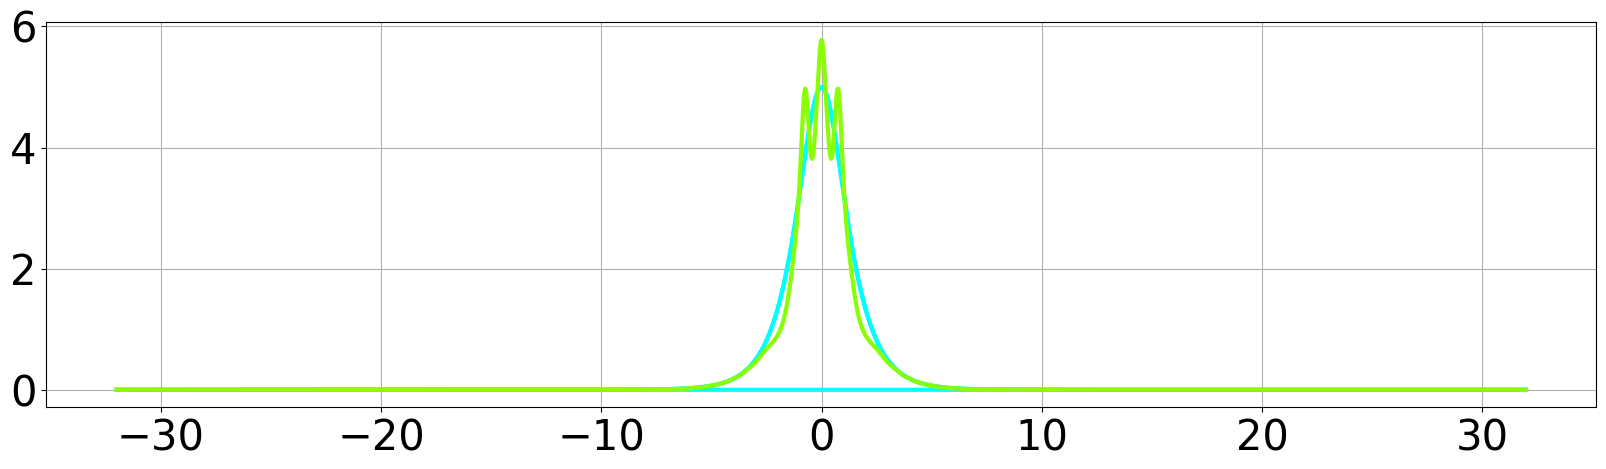

In [121]:
ampl = 5
chirp = 0.0

t_span = 64.0
n_t = 2 ** 11

dt = t_span / n_t
t = np.array([(i + 0) * dt - t_span / 2 for i in range(n_t)])
print("t =", t[0], t[-1], len(t))

xi_span = np.pi / dt
n_xi = n_t # 2 ** 8
d_xi = xi_span / n_xi
xi = np.array([(i + 1) * d_xi - xi_span / 2. for i in range(n_xi)])
print("xi_old  =", xi[0], xi[-1])
# For FNFT (the same + d_xi to all values)
rv, xi_val = nsev_inverse_xi_wrapper(n_t, t[0], t[-1], n_xi)
xi = xi_val[0] + np.arange(n_xi) * (xi_val[1] - xi_val[0]) / (n_xi - 1)
d_xi = xi[1] - xi[0]

print("xi_fnft =", xi[0], xi[-1])
q, a_xi, b_xi, xi_discr, b_discr, r_discr, ad_discr = test_signals.get_sech(t, xi, a=ampl, c=chirp)
#q *= np.exp(1j*np.pi/3 + 2j*t)
#q = np.roll(q, int(n_t/30))
print(len(xi_discr), xi_discr)
z_prop = 0.5
q_prop = ssfm.fiber_propagate(q, t_span, z_prop, n_span=2 ** 9, gamma=1, beta2=-1)

matplotlib.rcParams.update({'font.size': 30})
# color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(1, 1, figsize=(20, 5))
axs.plot(t, np.absolute(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.real(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.imag(q), 'xkcd:cyan', linewidth=3)
axs.plot(t, np.absolute(q_prop), 'xkcd:lime green', linewidth=3)
axs.grid(True)

# print(b_xi)

In [30]:
result_cont = nft.get_continuous_spectrum(q, t, xi=None, type='fnft', xi_upsampling=1, fnft_type=0, nft_type='tes4', res_poly=None, coefficient_type='left')

a = result_cont['a']
b = result_cont['b']
r = result_cont['r']

fig = go.Figure()
fig.add_trace(go.Scatter(x=xi, y=r.real))
fig.add_trace(go.Scatter(x=xi, y=r.imag))
fig.show()

In [31]:
r3 = np.roll(r, 1)
r3[0] = np.conj(r3[0])

#omega_r = fftshift(ifft(r[::-1])) * n_t / t_span / 2
omega_r = fftshift(fft(np.roll(r,1))) / 2 / t_span
omega_r = fftshift(fft(r)) / 2 / t_span

#omega_r *= np.exp(-1j * np.pi * t / t_span * (n_t - 1) / n_t * (-1))

print("r = ", r)
print("r = ", np.roll(r, 1))
for i in range(len(omega_r)):
    if i % 2:
        omega_r[i] = - omega_r[i]
    print("omega_r[", i, "] =", omega_r[i])
#omega_r = omega_r[::-1]
#omega_r = np.append(omega_r[0], omega_r)
#omega_r = np.append(omega_r[-1], omega_r)
#omega_r = np.append(omega_r, omega_r[0])

ind_t = 1

# первое 1/n_t берется из определения FFT
xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),-1) * np.pi / t_span * (n_t - 1)
print(np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),-1))
xi2[-1] *= -1
print("xi2 =", xi2)
print("xi  =", xi)
print(xi2[-1] * t_span / np.pi * n_xi)
#print("omega1 =", 0.5/t_span * (r[0] * np.exp(-2 * np.pi * 1j * 1 * 0 / 2) + r[1] * np.exp(-1j * (1 * t_span/(n_t - 1)) * xi2[1])))

ind_t = 0
print("omega0 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *0/n_xi))
                                 + r[1] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *1/n_xi))
                                 + r[2] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *2/n_xi))
                                 + r[3] * np.exp(-1j * (ind_t/(n_t - 1)) * (np.pi *3/n_xi))
                                ))
print("omega0_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * -2)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                ))
ind_t = 1
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * t[ind_t] * xi[0])
                                 + r[1] * np.exp(-1j * t[ind_t] * xi[1])
                                 + r[2] * np.exp(-1j * t[ind_t] * xi[2])
                                 + r[3] * np.exp(-1j * t[ind_t] * xi[3])
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[0])
                                 + r[1] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[1])
                                 + r[2] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[2])
                                 + r[3] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * xi2[3])
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * -1)
                                 + r[1] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 0)
                                 + r[2] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 1)
                                 + r[3] * np.exp(-1j * (ind_t / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 2)
                                ))
print("omega1 =", 0.5 / np.pi * d_xi * (
                                 + r[0] * np.exp(-1j * np.pi * ind_t / n_t * -1)
                                 + r[1] * np.exp(-1j * np.pi * ind_t / n_t * 0)
                                 + r[2] * np.exp(-1j * np.pi * ind_t / n_t * 1)
                                 + r[3] * np.exp(-1j * np.pi * ind_t / n_t * 2)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 2)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 3)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * -2)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * -1)
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                ))
print("omega1_FFT =", 0.5 / t_span * (
                                 + r[0] * np.exp(-2j * np.pi * ind_t / n_t * -1)
                                 + r[1] * np.exp(-2j * np.pi * ind_t / n_t * 0)
                                 + r[2] * np.exp(-2j * np.pi * ind_t / n_t * 1)
                                 + r[3] * np.exp(-2j * np.pi * ind_t / n_t * 2)
                                ))
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

r =  [ 1.56234620e-16-4.30212140e-16j -1.50399582e-16-4.71274528e-16j
 -3.31348082e-17-4.97864458e-16j ...  7.90853132e-17+3.66833863e-16j
 -2.91475546e-16+3.17188603e-16j  2.00103694e-16+4.68881629e-16j]
r =  [ 2.00103694e-16+4.68881629e-16j  1.56234620e-16-4.30212140e-16j
 -1.50399582e-16-4.71274528e-16j ... -1.80612346e-16+3.07014695e-16j
  7.90853132e-17+3.66833863e-16j -2.91475546e-16+3.17188603e-16j]
omega_r[ 0 ] = (1.2028789422857677e-14+2.6591600102314828e-17j)
omega_r[ 1 ] = (9.368889128044677e-15+2.680234608618567e-17j)
omega_r[ 2 ] = (1.0522913920438248e-14+1.759449753048639e-17j)
omega_r[ 3 ] = (1.0971577108203484e-14+3.840855037813301e-17j)
omega_r[ 4 ] = (1.176742893665289e-14-2.966999182792168e-17j)
omega_r[ 5 ] = (1.2396130671422922e-14+1.3275531447072301e-17j)
omega_r[ 6 ] = (1.3254622280387679e-14-1.5436404247818228e-17j)
omega_r[ 7 ] = (1.4045629080378791e-14+4.6803830410330614e-18j)
omega_r[ 8 ] = (1.4986865643894925e-14-2.933878280699714e-17j)
omega_r[ 9 ] = (1.581

In [32]:
np.exp(-1j * (3 / (n_t-1) * t_span) * (np.pi / t_span * (n_t - 1) / n_t) * 3)

(0.9996188224951786-0.02760814577896574j)

In [33]:
omega_r = np.zeros(n_t, dtype=np.complex128)
c = 0.5 / np.pi * 0.5 * d_xi
print(d_xi)
for j in range(n_t):
    exp_xi_t = np.exp(-1.0j * t[j] * xi)
    print("t[j] =", t[j])
    print("xi =", xi)
    print("r =", r)
    print("exp_xi_t =", exp_xi_t)

    x = r * exp_xi_t
    print("x =", x)
    xi2 = np.roll(np.fft.fftshift(np.fft.fftfreq(n_xi)),1) * np.pi / t_span
    xi2[-1] *= -1
    print("xi=", xi2)
    print("xi_div=", (n_t/2 + 1) / n_t)
    #omega_r[j] = 0.5 / np.pi * trapz(x, dx=d_xi)  # trapz method to integrate

    omega_r[j] = 2 * c * np.sum(x)  # left Riemann sum
    # print("omega_r[j]=", omega_r[j])
    # omega_r[j] = c * (np.sum(x[0:len(x) - 1]) + np.sum(x[1:len(x)]))  # middle Riemann sum
    print(j, omega_r[j])

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=omega_r.real))
fig.add_trace(go.Scatter(x=t, y=omega_r.imag))
fig.show()

0.049039448312719
t[j] = -32.0
xi = [-25.05915809 -25.01011864 -24.96107919 ...  25.01011864  25.05915809
  25.10819754]
r = [ 1.56234620e-16-4.30212140e-16j -1.50399582e-16-4.71274528e-16j
 -3.31348082e-17-4.97864458e-16j ...  7.90853132e-17+3.66833863e-16j
 -2.91475546e-16+3.17188603e-16j  2.00103694e-16+4.68881629e-16j]
exp_xi_t = [-0.70602126+0.70819064j -0.70927283-0.70493408j  0.70384524-0.71035335j
 ... -0.70927283+0.70493408j -0.70602126-0.70819064j
  0.70710678-0.70710678j]
x = [ 1.94367246e-16+4.14382813e-16j -2.25543140e-16+4.40284007e-16j
 -3.76981461e-16-3.26882107e-16j ... -3.14686755e-16-2.04435358e-16j
  4.30417931e-16-1.75216450e-17j  4.73044059e-16+1.90054700e-16j]
xi= [ 0.02449576 -0.02454369 -0.02449576 ...  0.02435195  0.02439988
 -0.02444782]
xi_div= 0.5009765625
0 (5.700868466251582e-11+3.716387569538411e-08j)
t[j] = -31.93743890518084
xi = [-25.05915809 -25.01011864 -24.96107919 ...  25.01011864  25.05915809
  25.10819754]
r = [ 1.56234620e-16-4.30212140e-16j -1

## WITHOUT PROPAGATION

In [124]:
import nft_analyse as nft
reload(nft)

xi_upsampling = 1
forward_continuous_type= 'fnft' #'fnft' 'slow'
forward_discrete_type='pjt' # 'fnft' 'pjt'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=27 # 0 = MOD_AL, 5 = 2SPLIT2B, 21 = 4SPLIT4B, 27 = TES4
nft_type='tes4'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q, t, 0, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print("eig_num:", xi_d_calculated)
print("eig_exact:", xi_discr)
print("bd_num:", res_dbp['bd_prop'])
print("b_prop =", res_dbp['b_prop'][int(n_t/2)])
print("q_tib_total=", q_tib_total[int(n_t/2)])
print("q_fnft=", q_fnft[int(n_t/2)])


# for fnft len(xi) == len(q)
#res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
#q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

-50.21639507222435 50.26548245743669
Time to calculate discrete spectrum 361.036 ms
Number of discrete eigenvalues: 5
Time to calculate continuous part of Omega 0.0 ms
Time to calculate discrete part of Omega 217.98899999999998 ms
Time to calculate TIB 931.798 ms
Time to calculate continuous part of Omega 0.9970000000000001 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 3.9890000000000003 ms
Time to calculate all TIBs 1154.7730000000001 ms
Time to calculate inverse FNFT 33.983 ms
eig_num: [ 3.02645255e-24+4.5j  8.39342527e-19+3.5j -1.47837380e-16+2.5j
 -4.66722331e-20+1.5j  1.44097048e-20+0.5j]
eig_exact: [0.+4.5j 0.+3.5j 0.+2.5j 0.+1.5j 0.+0.5j]
bd_num: [-1.-3.45992913e-25j  1.-6.60497025e-19j -1.+2.11195879e-17j
  1.+9.25594032e-21j -1.-6.38554816e-22j]
b_prop = (-1.037635984912717e-10+1.0490513186582862e-15j)
q_tib_total= (5.020328605754611+2.9941325426366093e-16j)
q_fnft= (5.000000003288395+7.183809492674211e-17j)
(2048,) (2048,)


In [125]:
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q), name="q"))
fig.show()

color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft_still), name="q_fnft_still"))
fig.show()

## WITH PROPAGATION

In [116]:
import nft_analyse as nft
reload(nft)

z_back = z_prop
xi_upsampling = 1
forward_continuous_type='fnft'
forward_discrete_type='pjt' # 'fnft'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0
nft_type='bo'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q_prop, t, z_back, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']
b = res_dbp['b_prop']

xi_d_calculated = res_dbp['xi_d']
print(xi_d_calculated)
print(xi_discr)




# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

-6.234097921967246 6.283185307179586
Time to calculate discrete spectrum 553.6790000000001 ms
Number of discrete eigenvalues: 4
Time to calculate continuous part of Omega 0.0 ms
Time to calculate discrete part of Omega 223.708 ms
Time to calculate TIB 877.111 ms
Time to calculate continuous part of Omega 0.998 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 0.0 ms
Time to calculate all TIBs 1103.0990000000002 ms
Time to calculate inverse FNFT 3.87 ms
[-1.16065798e-11+4.83543169j -3.17346990e-11+4.04284197j
  1.56578173e-01+1.23890022j -1.56578173e-01+1.23890022j]
[0.+4.5j 0.+3.5j 0.+2.5j 0.+1.5j 0.+0.5j]
(256,) (256,)


In [117]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.real(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.real(q), name="q"))
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.imag(q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.imag(q_fnft_still), name="q_fnft_still"))
fig.add_trace(go.Scatter(x=t, y=np.imag(q), name="q"))
fig.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_tib_total), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft), name="q_fnft"))
#fig.add_trace(go.Scatter(x=t, y=np.absolute(q - q_fnft_still), name="q_fnft_still"))
fig.show()

In [96]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=np.real(b), name="q_tib_total"))
fig.add_trace(go.Scatter(x=t, y=np.imag(b), name="q_fnft"))
fig.show()

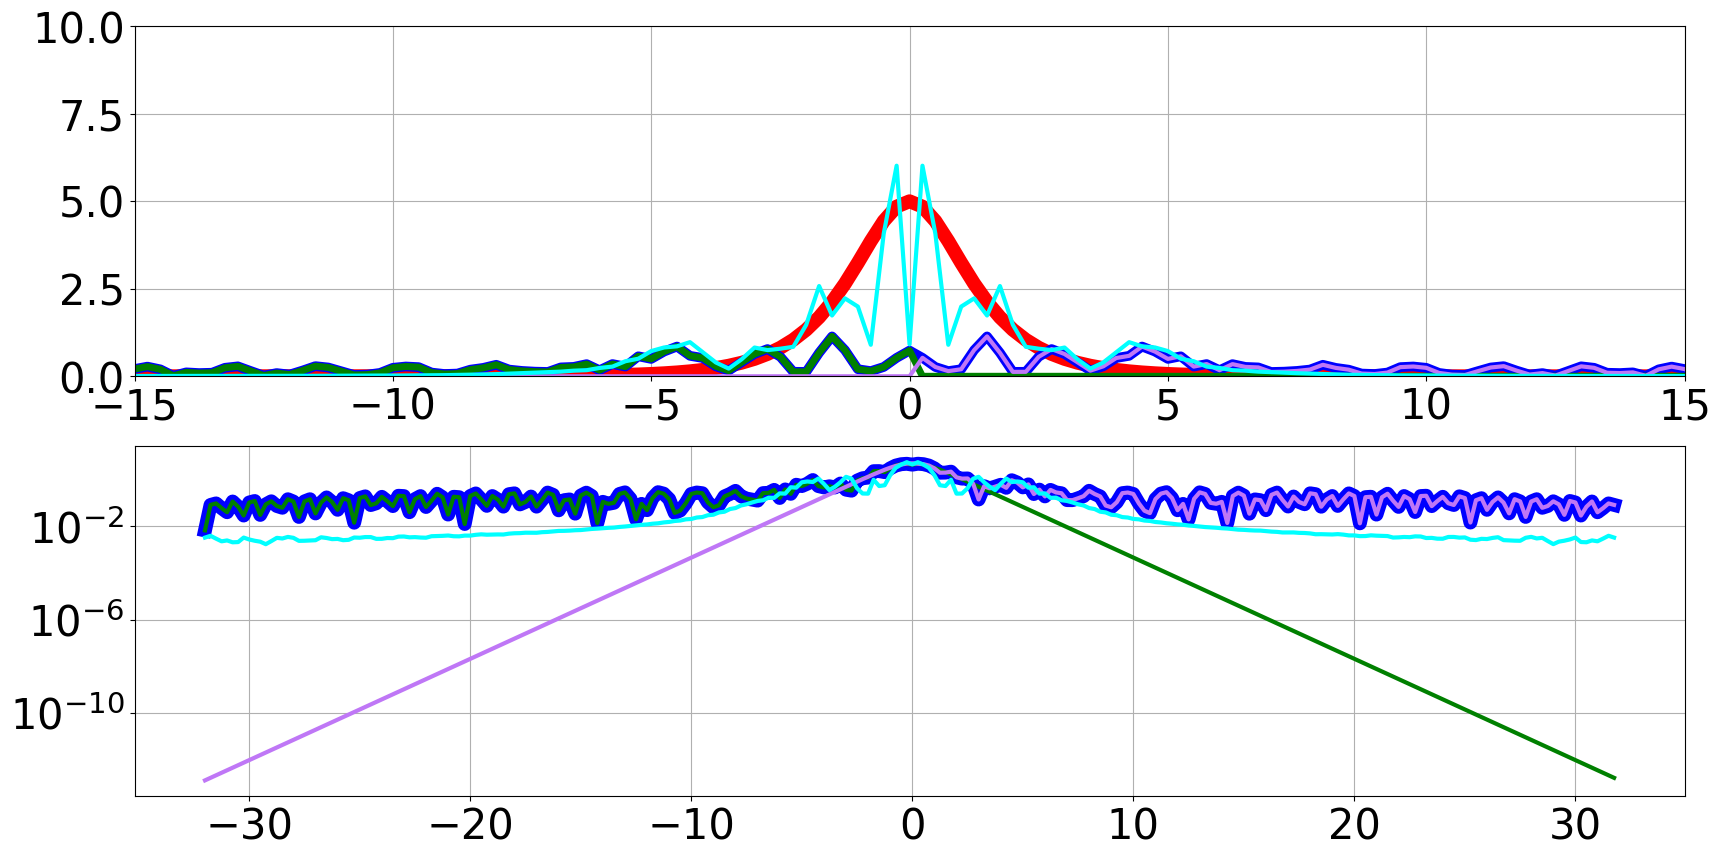

In [66]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(q), color[0], linewidth=10)
axs[0].plot(t, np.absolute(q_tib_total), color[1], linewidth=7)
axs[0].plot(t, np.absolute(q_tib_left), color[2], linewidth=5)
axs[0].plot(t, np.absolute(q_tib_right), color[3], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft), color[4], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft_still), color[5], linewidth=3)
axs[0].grid(True)
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(0, 2*ampl)

axs[1].plot(t, np.absolute(q - q_tib_total), color[1], linewidth=10)
axs[1].plot(t, np.absolute(q - q_tib_left), color[2], linewidth=3)
axs[1].plot(t, np.absolute(q - q_tib_right), color[3], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft), color[4], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft_still), color[5], linewidth=3)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## WITH PROPAGATION

In [197]:
import nft_analyse as nft
reload(nft)

z_back = z_prop
xi_upsampling = 1
forward_continuous_type='fnft'
forward_discrete_type='pjt' # 'fnft'
forward_discrete_coef_type='bi-direct'
inverse_type='both'
fnft_type=0
nft_type='bo'
use_contour = False
n_discrete_skip = 2

res_dbp = nft.make_dbp_nft(q_prop, t, z_back, xi_upsampling=xi_upsampling,
                           forward_continuous_type=forward_continuous_type,
                           forward_discrete_type=forward_discrete_type,
                           forward_discrete_coef_type=forward_discrete_coef_type,
                           inverse_type=inverse_type,
                           fnft_type=fnft_type, nft_type=nft_type,
                           use_contour=use_contour, n_discrete_skip=n_discrete_skip,
                           print_sys_message=True)

q_tib_total = res_dbp['q_total']
q_tib_left = res_dbp['q_tib_left']
q_tib_right = res_dbp['q_tib_right']
q_fnft = res_dbp['q_fnft']

xi_d_calculated = res_dbp['xi_d']
print(xi_d_calculated)
print(xi_discr)




# for fnft len(xi) == len(q)
res = nsev_inverse(xi, t, b_xi, xi_discr, b_discr / ad_discr, cst=1, dst=0, dis=fnft_type)
q_fnft_still = res['q']

print(np.shape(b_xi), np.shape(xi))

Time to calculate discrete spectrum 0.9990000000000001 ms
Number of discrete eigenvalues: 0
Time to calculate continuous part of Omega 219.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 91.0 ms
Time to calculate continuous part of Omega 222.0 ms
Time to calculate discrete part of Omega 0.0 ms
Time to calculate TIB 26.0 ms
Time to calculate all TIBs 558.0 ms
Time to calculate inverse FNFT 25.0 ms
[]
[-0.-0.05j]
(2048,) (2048,)


C:\ProgramData\Anaconda3\envs\tensorflow_2_9\lib\site-packages\fnftpy-0.3.0-py3.9.egg\FNFTpy\auxiliary.py:158: UserWarning: An error occured when calling FNFT: error code 7


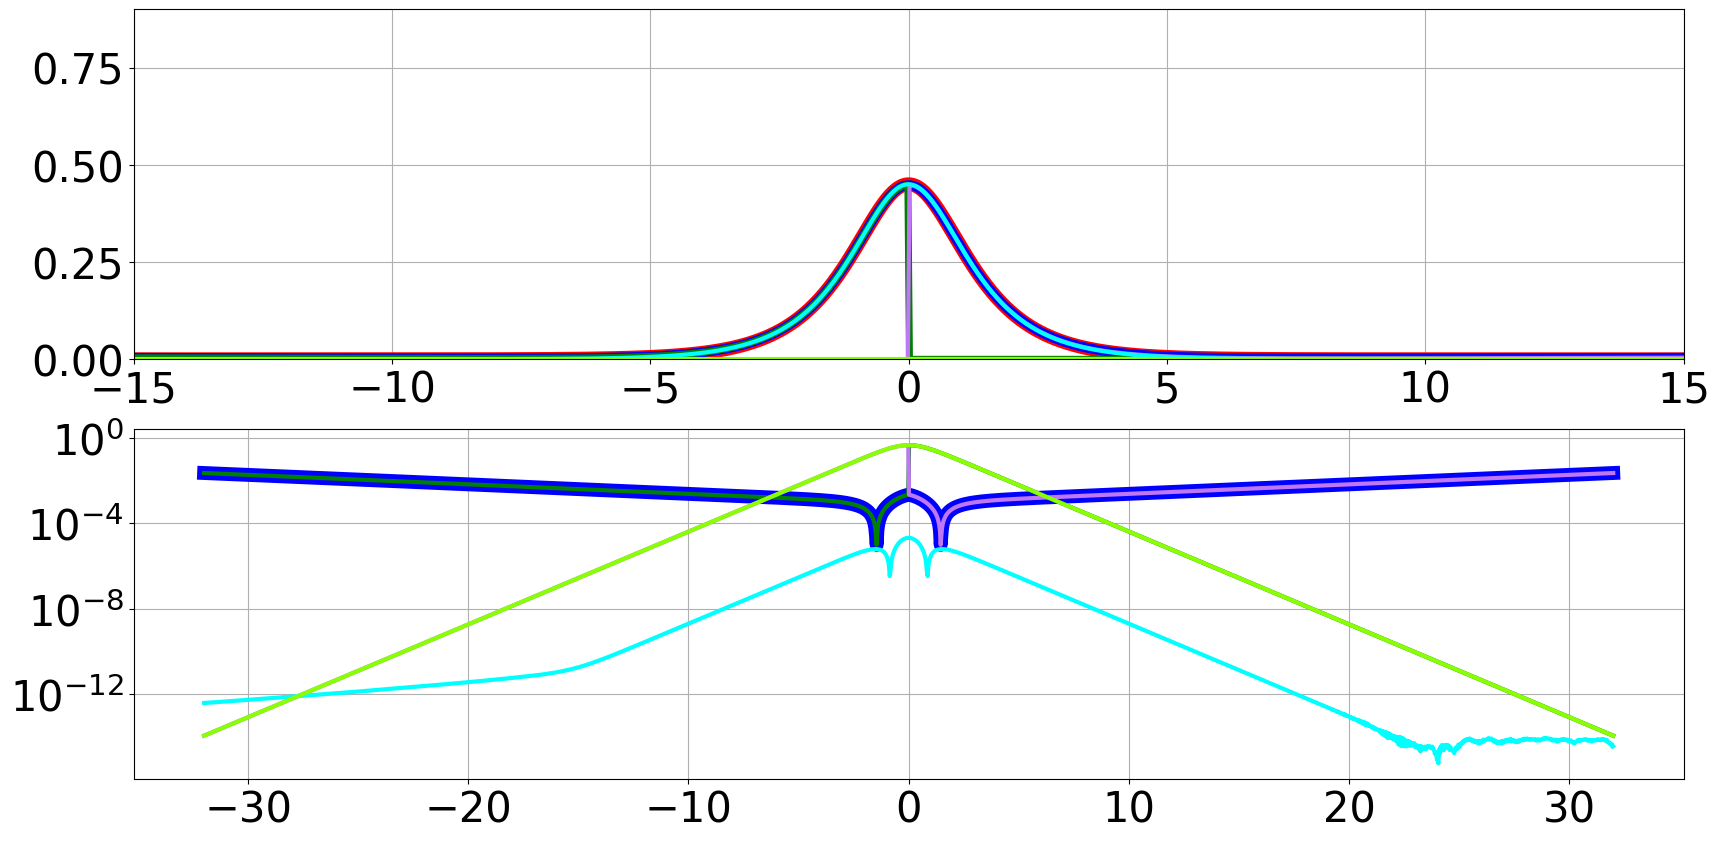

In [198]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan', 'xkcd:lime green']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(q), color[0], linewidth=10)
axs[0].plot(t, np.absolute(q_tib_total), color[1], linewidth=7)
axs[0].plot(t, np.absolute(q_tib_left), color[2], linewidth=5)
axs[0].plot(t, np.absolute(q_tib_right), color[3], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft), color[4], linewidth=3)
axs[0].plot(t, np.absolute(q_fnft_still), color[5], linewidth=3)
axs[0].grid(True)
axs[0].set_xlim(-15, 15)
axs[0].set_ylim(0, 2*ampl)

axs[1].plot(t, np.absolute(q - q_tib_total), color[1], linewidth=10)
axs[1].plot(t, np.absolute(q - q_tib_left), color[2], linewidth=3)
axs[1].plot(t, np.absolute(q - q_tib_right), color[3], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft), color[4], linewidth=3)
axs[1].plot(t, np.absolute(q - q_fnft_still), color[5], linewidth=3)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

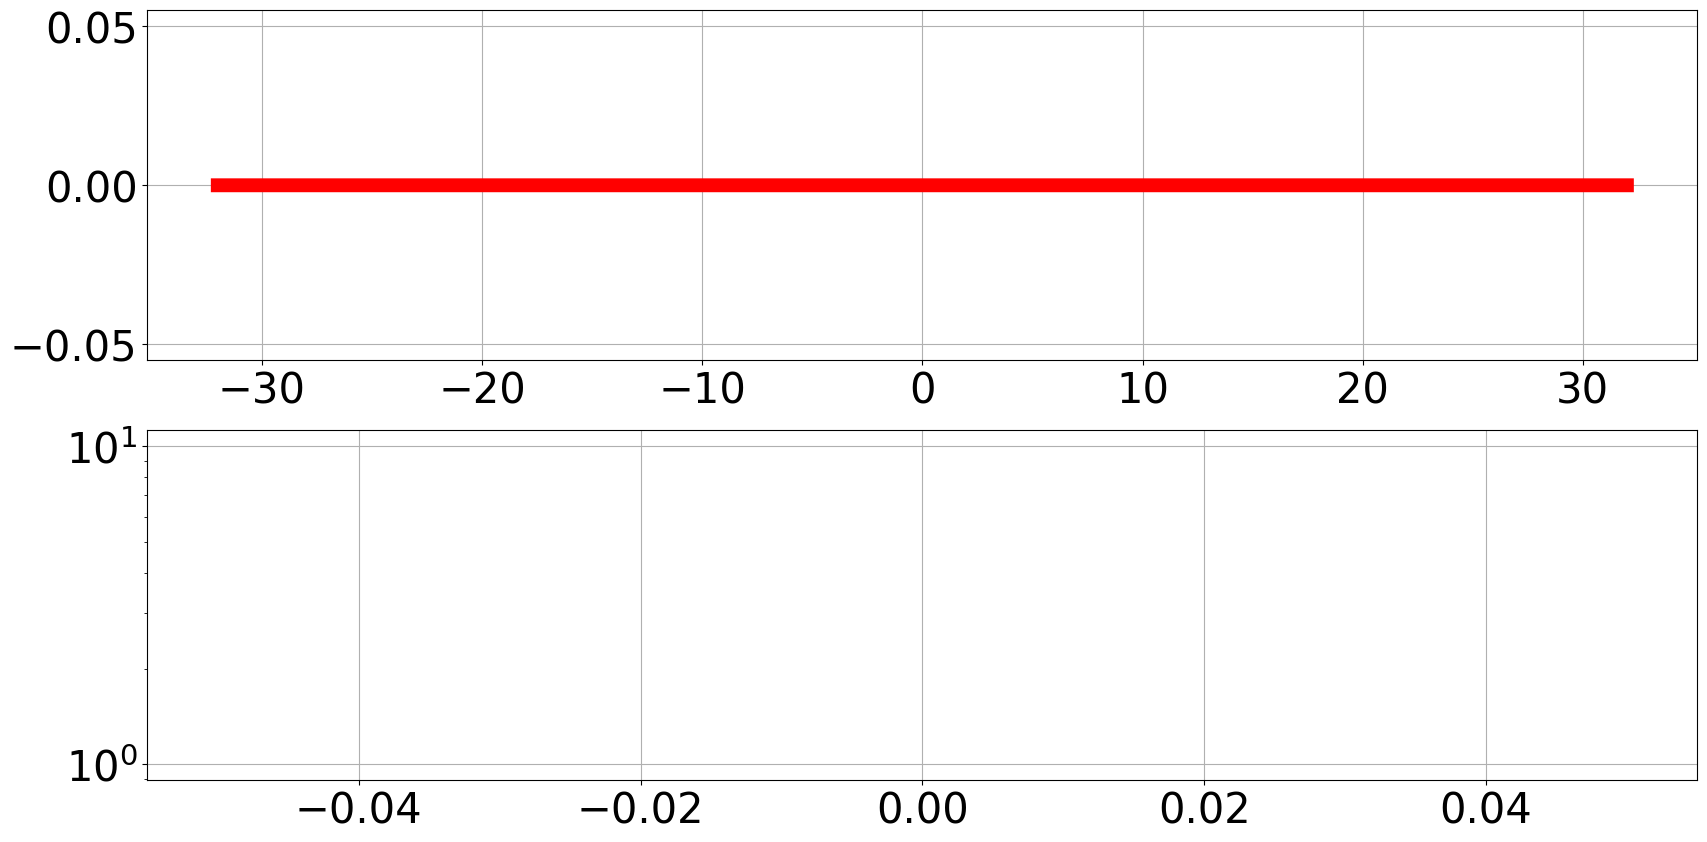

In [50]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(t, np.absolute(res_dbp['b_prop']), color[0], linewidth=10)
axs[0].plot(t, np.absolute(b_xi), color[1], linewidth=7)
axs[0].grid(True)
# axs[0].set_xlim(-5, 5)
# axs[0].set_ylim(0, ampl + 0.5)

axs[1].plot(t, np.absolute(res_dbp['b_prop'] - b_xi), color[1], linewidth=10)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

## Test bi-directional for arbitrary spectral parameter

In [56]:
reload(nft)
contour_ampl = 0.1
xi_span_test = 2
n_xi_test = 2 ** 7
xi_test = nft.get_raised_contour(contour_ampl, xi_span_test, n_xi_test)

a_test, b_test = nft.do_bi_direct_arbitrary_array(q, t, xi_test, 'tes4')
b_xi_test = test_signals.get_sech_b_coef(xi_test, ampl, chirp)



In [29]:
print(xi_discr)
print(nft.do_bi_direct_arbitrary(q, t, xi_discr[0], 'tes4'))

[0.+1.4993749j 0.+0.4993749j]
((5.5508636205285225e-08-4.334753515793568e-18j), (-0.9982872214516879+0.044181522832452066j))


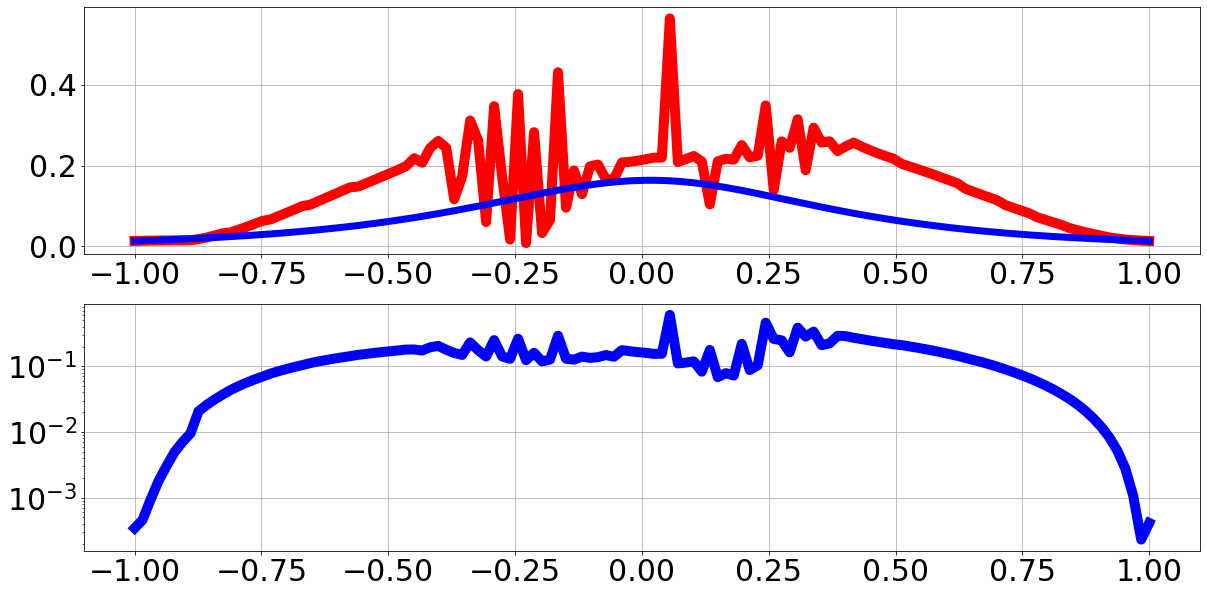

In [57]:
matplotlib.rcParams.update({'font.size': 30})
color = ['red', 'blue', 'green', 'xkcd:light purple', 'xkcd:cyan']
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(np.real(xi_test), np.absolute(b_test), color[0], linewidth=10)
axs[0].plot(np.real(xi_test), np.absolute(b_xi_test), color[1], linewidth=7)
axs[0].grid(True)
# axs[0].set_xlim(-5, 5)
# axs[0].set_ylim(0, ampl + 0.5)

axs[1].plot(np.real(xi_test), np.absolute(b_test - b_xi_test), color[1], linewidth=10)
axs[1].grid(True)
axs[1].set_yscale('log')

#set y ticks
y_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
axs[1].yaxis.set_major_locator(y_major)
y_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
axs[1].yaxis.set_minor_locator(y_minor)
axs[1].yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())